In [2]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_test_actual = x_test
x_train = tf.keras.utils.normalize(x_train, axis=1).reshape(x_train.shape[0], -1)
x_test = tf.keras.utils.normalize(x_test, axis=1).reshape(x_test.shape[0], -1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu, input_shape = x_train.shape[1:])) # hidden layer 1
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu)) # hidden layer 2
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax)) #@param: num outputs, softmax

model.compile(optimizer = "adam", 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
             ) # loss = error. Minimize Loss

model.fit(x_train, y_train, epochs = 3) #epocs = number of times passes through ENTIRE dataset


#MODELS
#Sequential Class = Feed Forward - most common
#Model Class
#@param: layers - list of layers to add to the model


'''
- Add layers one at time (think topology)

Activation Functions
 - rel      -> Output x if x > 0 else output 0 (linear in positive axis)
            -> makes network lighter as now on average only 50% of neurons fire at starting random weights
 
 - sigmoid  -> Ensures number is between 0 and 1 (non linear - stack layers)
            -> Works well for classifiers
 
 - tanh     -> Sigmoid -1 < x < 1 (non linear - stack layers)
 
 - softmax  -> normalizes vector input to a probability distribution (0, 1)
 

Optimizers - Most complex part of neural net. The algorithm used to update weights
 - adam                             -> Default go to
 - stocastic gradient descent 'SGD' -> Gradient Descent

Loss
 - TO-DO
 
Deciding on Number of Hidden Layers and Nodes
 - 'Most projects only require one hidden layer
 - The numner of hidden nodes usually should be between the number of input nodes (784) and output nodes (10)

Overfitting
 - Memorizing all samples rather than learning the patterns

'''






Instructions for updating:
Colocations handled automatically by placer.
Epoch 1/3
60000/60000 [==============================] - 7s 113us/sample - loss: 0.2622 - acc: 0.9227s - loss: 0.2636 - acc: 0.92
Epoch 2/3
60000/60000 [==============================] - 8s 127us/sample - loss: 0.1083 - acc: 0.9667
Epoch 3/3
60000/60000 [==============================] - 8s 132us/sample - loss: 0.0737 - acc: 0.9770


"\n- Add layers one at time (think topology)\n\nActivation Functions\n - rel      -> Output x if x > 0 else output 0 (linear in positive axis)\n            -> makes network lighter as now on average only 50% of neurons fire at starting random weights\n \n - sigmoid  -> Ensures number is between 0 and 1 (non linear - stack layers)\n            -> Works well for classifiers\n \n - tanh     -> Sigmoid -1 < x < 1 (non linear - stack layers)\n \n - softmax  -> normalizes vector input to a probability distribution (0, 1)\n \n\nOptimizers - Most complex part of neural net. The algorithm used to update weights\n - adam                             -> Default go to\n - stocastic gradient descent 'SGD' -> Gradient Descent\n\nLoss\n - TO-DO\n \nDeciding on Number of Hidden Layers and Nodes\n - 'Most projects only require one hidden layer\n - The numner of hidden nodes usually should be between the number of input nodes (784) and output nodes (10)\n\nOverfitting\n - Memorizing all samples rather th

In [84]:
#TESTING FOR OVER FITTING

val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

#out of sample training accuracy should be lower, loss should be higher (not by a huge amount)
#large delta = overfitting (Maybe fix by reducing num of epochs)

10000/10000 [==============================] - 1s 105us/sample - loss: 0.0984 - acc: 0.9703
0.0984018121900037 0.9703


In [73]:
model.save('num_reader.model')

In [74]:
new_model = tf.keras.models.load_model('num_reader.model')

import numpy as np
import matplotlib.pyplot as plt

def predict(model_test, num):
    predictions = model_test.predict([x_test])
    print(np.argmax(predictions[num]))
    plt.imshow(x_test_actual[num], cmap = plt.cm.binary)
    plt.show()

7


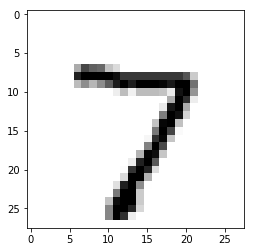

In [75]:
predict(new_model, 0)